In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

### References

Authors who are consistent (10 year career span and atleast 10 papers published) are derived from the notebook 'cumulative-adv-author-statistics-for-analysis'

'authors-scientific-start-end-year.csv' is one of the byproduct of that. But it contains a lot of sparse values, In the sense it contains 
a lot of authors who dropped out early in their career

'authors-scientific-atleast-10-year-10-papers.csv' - contains consistent authors 
Code snippet from 'cumulative-adv-cohort-analysis-for-1970-authors' notebook is heavily used

In [2]:
start_time = timeit.default_timer()
print(start_time)

1.2440019667671095e-06


In [50]:
max_years = 15
#authorStartEndCareerData = pd.read_csv('data/authors-scientific-start-end-year-publish-count.csv')
authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-15-year.csv')
#authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-20-year-20-papers.csv')
print(authorStartEndCareerData.head())

selectedAuthor = authorStartEndCareerData["author"].unique()
print(len(selectedAuthor))

authorPublicationsData = pd.read_csv('data/author_publications_1970_2016_asiansAsNone.txt')
authorPublicationsData = authorPublicationsData[authorPublicationsData["year"] > 1900]
authorPublicationsData.head()
#get the year list - as it helps to enumerate and find gini co-efficient for each year (irrespective of the dataset)
years = np.sort(authorPublicationsData['year'].unique())
print(years)

               author  start_year  end_year  pub_count  career_length
0          a min tjoa        1979      2015        193             36
1    a-imam al-sammak        1992      2008          6             16
2          a-xing zhu        1998      2015         16             17
3  a. a. (louis) beex        1980      2016         34             36
4     a. a. a. nasser        1993      2014          3             21
110468
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


In [4]:
#groupByStartYearScientificCareerData = authorStartEndCareerData[['author','start_year']].groupby(['start_year'])
#print(groupByStartYearScientificCareerData.head())
#groupByStartYearScientificCareerData.groups

                    author  start_year
0         a-imam al-sammak        1992
1               a-xing zhu        1998
2          a. a. a. nasser        1993
3         a. a. abouelsoud        1996
4              a. a. diwan        1991
5               a. a. khan        1994
6               a. a. naik        1992
7          a. a. polezhaev        1992
8                 a. abbas        1992
9             a. abdeldaim        1999
10                  a. abe        2000
11             a. aggarwal        1992
12               a. aggoun        1995
13              a. aguilar        1999
14                a. ahmed        2000
15                  a. ali        1999
16                 a. amin        1993
17           a. ananda rao        2000
18       a. antonio arroyo        1991
19             a. antoniou        1993
20               a. asenov        1995
21         a. aydin alatan        1994
22         a. b. pfahlberg        1994
23             a. banerjee        2000
24             a. barreir

,author,year,pub_id
0,kim l. blackwell,2014,55503da645ce0a409eb273e8
1,nima mesgarani,2014,55503da645ce0a409eb273e9
2,james j. abbas,2014,55503da645ce0a409eb273ea
3,eberhart zrenner,2014,55503da645ce0a409eb273ec
4,jonathan rubin,2014,55503da645ce0a409eb273e0


[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


In [16]:
#Group by both year and author - multi index and hierarchial indexing
groupByAuthorYearData = authorPublicationsData.groupby(['year','author']).count().reset_index()
#remove wrong data
groupByAuthorYearData = groupByAuthorYearData[groupByAuthorYearData["year"] > 1900]
print(groupByAuthorYearData.head())


print(groupByAuthorYearData[groupByAuthorYearData.author=="a min tjoa"])

# cumulative number of publications per author
groupByAuthorYearData = groupByAuthorYearData.set_index('year').sort_index()
print(groupByAuthorYearData.head())

groupByAuthorYearData["cum_num_pub"] = groupByAuthorYearData.groupby(['author'])['pub_id'].transform(pd.Series.cumsum)

print(groupByAuthorYearData.head())
print(groupByAuthorYearData[groupByAuthorYearData.author=="a min tjoa"])


groupByAuthorYearData = groupByAuthorYearData.reset_index()
print(groupByAuthorYearData.head())


   year         author  pub_id
1  1970    a. a. afifi       1
2  1970    a. a. bährs       1
3  1970     a. armenti       1
4  1970  a. b. slomson       1
5  1970    a. brindley       1
         year      author  pub_id
33441    1979  a min tjoa       1
85310    1985  a min tjoa       1
97532    1986  a min tjoa       1
174684   1990  a min tjoa       1
202846   1991  a min tjoa       3
234844   1992  a min tjoa       3
272008   1993  a min tjoa       6
317067   1994  a min tjoa       2
368211   1995  a min tjoa       3
422875   1996  a min tjoa       5
481285   1997  a min tjoa       2
547479   1998  a min tjoa       3
704037   2000  a min tjoa       8
797456   2001  a min tjoa       5
901042   2002  a min tjoa       3
1016522  2003  a min tjoa      11
1155822  2004  a min tjoa       8
1320620  2005  a min tjoa      13
1512469  2006  a min tjoa      23
1725678  2007  a min tjoa      13
1962107  2008  a min tjoa       8
2219975  2009  a min tjoa       8
2500826  2010  a min tjoa      1

In [23]:
#the following snippet is taken from the github project and the license is creative commons
#https://github.com/oliviaguest/gini

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.min(array) < 0:
        # Values cannot be negative:
        array -= np.min(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

### To check whether GINI calculation works correctly or not

In [19]:
#print(gini[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
#print(gini(range(10)))

TypeError: 'function' object is not subscriptable

               author  start_year  end_year  pub_count  career_length
0          a min tjoa        1979      2015        193             36
1    a-imam al-sammak        1992      2008          6             16
2          a-xing zhu        1998      2015         16             17
3  a. a. (louis) beex        1980      2016         34             36
4     a. a. a. nasser        1993      2014          3             21


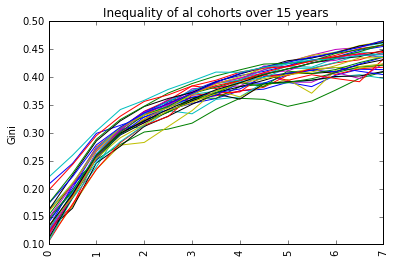

In [89]:
print(authorStartEndCareerData.head())
gini_per_cohort = pd.DataFrame(index=years)
non_publishers_track = pd.DataFrame(index=years)


fig2, ax2 = plt.subplots()

max_years = 15
# limit plot to the N years during which we follow a cohort
cohort_duration = np.arange(max_years)
    


for year in years:
    #we cannot follow the cohort for max years
    if year > (2016 - max_years):
        break
        
        
    #print("cohort: "+str(year))
    cohort = authorStartEndCareerData[authorStartEndCareerData["start_year"]==year]
    cohort_authors = cohort["author"].values
  
    gini_over_years = pd.Series(data=0, index=years)
    non_publishers_over_years = pd.Series(data=0, index=years)
    
    # extract num publications for the cohort in all future years
    for y in range(year, max(years)+1):
        #print("following years: "+str(y))
      
        # get all the authors data for each year and filter based on the authors that we are interested in
        temp = groupByAuthorYearData[groupByAuthorYearData["year"]==y]
        temp = temp[temp["author"].isin(cohort_authors)]
        
        # gini per year based on cumulative num of publications of all authors in this year
        gini_over_years.loc[y] = gini(temp['cum_num_pub'].astype("float").values)
       
        
    
    gini_per_cohort[year] = gini_over_years
   
    gini_years_df = pd.DataFrame(gini_over_years.reset_index())
    gini_years_df.columns = ["year", "gini"]
    gini_years = gini_years_df["year"].values
    gini_coefs= gini_years_df["gini"].values
    
    # Make one Bar Chart per COHORT
    #fig, ax = plt.subplots()
    #width = 0.3       # the width of the bars
    #Y = len(gini_years)
    #ind = np.arange(Y)
    #ax.set_title('Inequality for cohort: '+str(year))
    #rects = ax.bar(ind, gini_coefs, width, color='b')
    #ax.set_xticks(ind + width / 2)
    #ax.set_xticklabels(gini_years, rotation=90)
    #ax.set_ylabel('Gini')
    #plt.show()
    
    selected_gini_df = gini_years_df[(gini_years_df["year"] >= year) &  (gini_years_df["year"] < (year+max_years))]
    ax2.plot(cohort_duration, selected_gini_df["gini"])
   



# make line plot: one line for each cohort
# x-axis shows the N years which we follow the cohort
ax2.set_ylabel('Gini')
ax2.set_title('Inequality of al cohorts over '+str(max_years)+' years')
ax2.set_xticklabels(cohort_duration, rotation=90)
#ax2.legend(years)    
plt.show()

   


In [16]:
end_time = timeit.default_timer()
print(end_time)
print('Time taken - ',end_time-start_time)

120.79889899605931
Time taken -  120.79889775205734
